In [1]:
import datetime
print datetime.datetime.now()

2019-02-07 13:49:23.561346


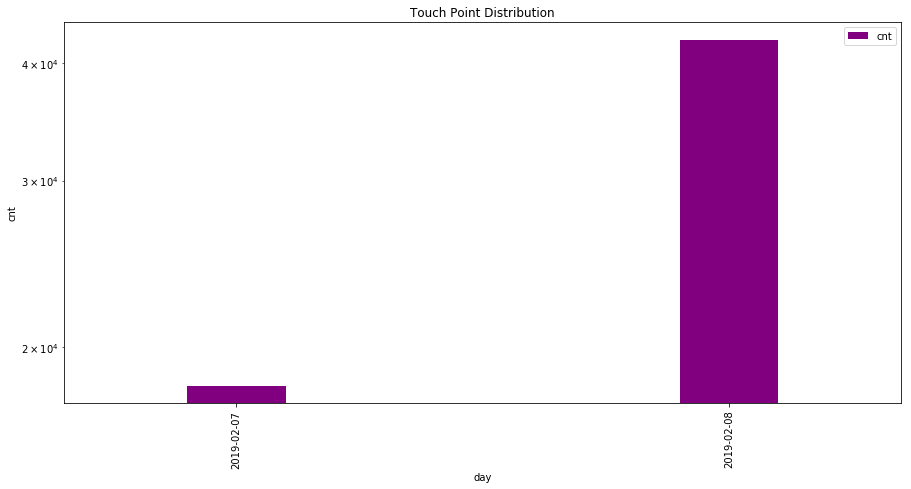

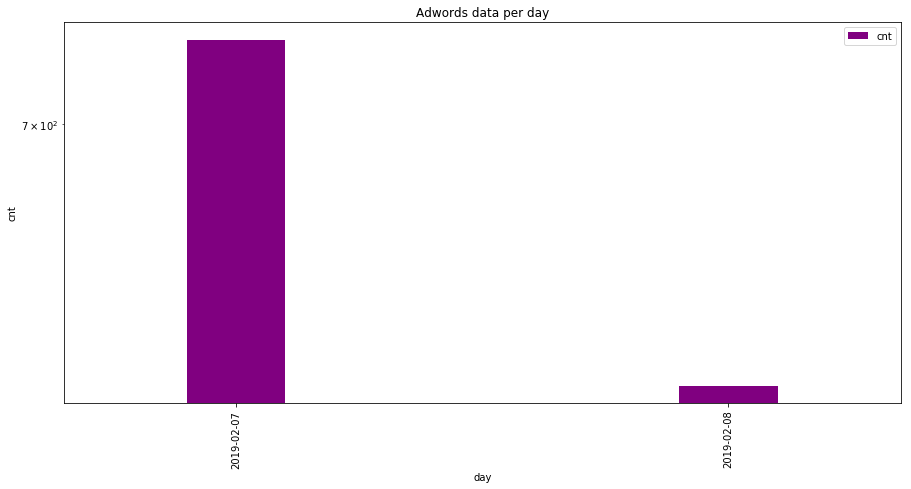

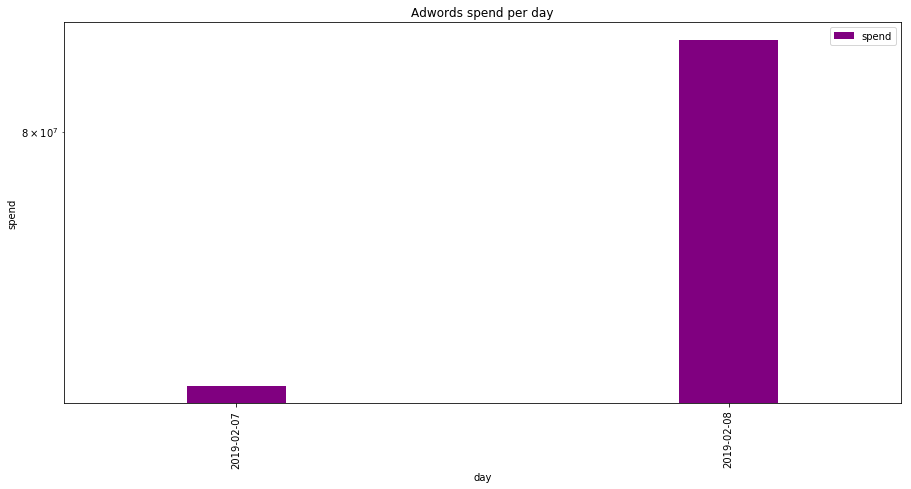

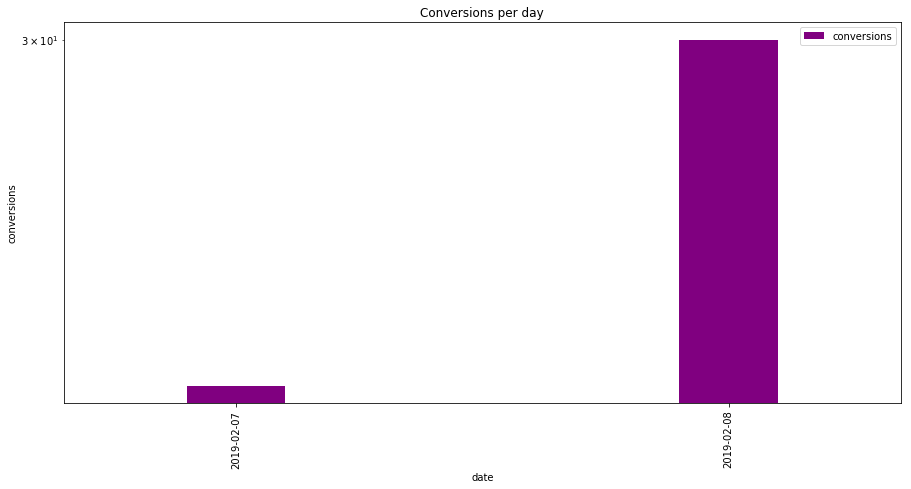

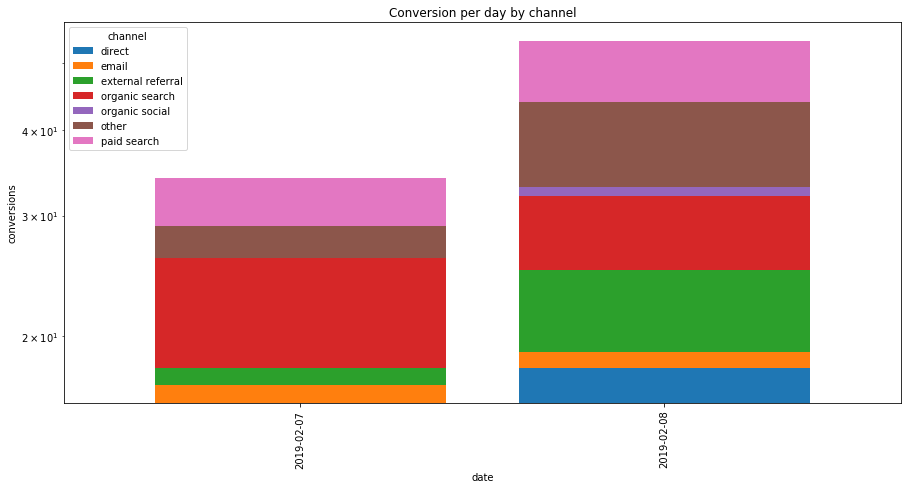

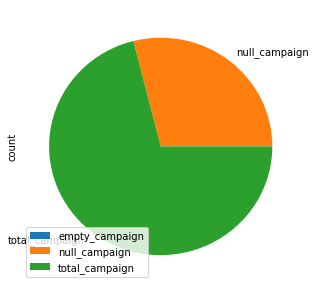

In [98]:
import re
import os
import time
import pandas as pd
from google.cloud import bigquery as bq
import matplotlib as mp
import os
import matplotlib.ticker as mtick
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
%matplotlib inline
arg_file='/tmp/.args'

def Send_Mail(message):
    msg = MIMEMultipart()
    password = "epzctiadpgbckssy"
    msg['From'] = "spillai@datalicious.com"
    msg['To'] = "spillai@datalicious.com"
    msg['Subject'] = "Missing files"
    msg.attach(MIMEText(message, 'plain'))
    server = smtplib.SMTP('smtp.gmail.com: 587')
    server.starttls()
    server.login(msg['From'], password)
    server.sendmail(msg['From'], msg['To'], msg.as_string())
    server.quit()
    
    
    
def Missing_files(clnt):
    client= bq.Client(clnt)
    count=0
    with open("missing_file.Sql")  as fo:
        queries=fo.read()
    qry_lst= queries.split(';')
    for val in qry_lst:
        qry=val.replace('@',("`"+clnt.strip('\n')))
        if qry.strip('\n')== '' :
            continue
        try:
            df=client.query(qry).to_dataframe()
        except Exception as e:
             count+=1
             continue
        if df.empty:
             Send_Mail('No file present for current date')
             count+=1
             continue
            
    
def Graph_Plot(clnt):
    client= bq.Client(clnt)
    l=['Touch Point Distribution','DCM  data per day','DCM spend per day','Facebook data per day','Facebook spend per day','Facebook Exposure data per day','Kenshoo data per day','Kenshoo spend per day','Adwords data per day','Adwords spend per day','Bing data per day','Bing spend per day','Criteo data per day','Criteo spend per day','Search Ads Campaign data per day','Search Ads Campaign spend per day','Serach Ads Keyword data per day','Search Ads Keyword spend per day','Email spend per day','IXI Transaction data','Conversions per day','Conversion per day by channel','Path Length Distribution','Path Length Distribution by channel','Revenue per day','Revenue per day by channel','spend by channel per day','Null campaign V/S Total campaign']
    count=0
    with open("query.Sql")  as fo:
        queries=fo.read()
    Result=[]
    qry_lst= queries.split(';')
    for val in qry_lst:
        qry=val.replace('@',("`"+clnt.strip('\n')))
        if qry.strip('\n')== '' :
            continue
        try:
            df=client.query(qry).to_dataframe()
        except Exception as e:
             count+=1
             continue
        if df.empty:
             count+=1
             continue
        if (list(df)[0])=='campaign':
            ax=pd.pivot_table(df, index = 'campaign').plot(kind='pie',y='count',figsize=(5,5))
        elif len(list(df))==2:
                
                ax=pd.pivot_table(df, index = list(df)[0],values =list(df)[1]).plot(kind = 'bar',title=(l[count]),width=0.2,color='purple',figsize=(15,7))
                ax.set_yscale('log',basey=10)
                ax.set_ylabel(list(df)[1])
                
                #for p in ax.patches:
                    #ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        else:
                ax=pd.pivot_table(df, index = list(df)[0], columns =list(df)[1], values =list(df)[2]).plot(kind = 'bar',title=(l[count]),width=0.8,figsize=(15,7),stacked=True)
                ax.set_yscale('log',basey=10)
                ax.set_ylabel(list(df)[2])
        mp.pyplot.show()
        count+=1
        
def main():
    if os.path.isfile(arg_file):
        with open(arg_file,'r+') as fo:
            clnt=fo.read().split('\n')[0]
    Graph_Plot(clnt)
    #Missing_files(clnt)
    
    
if __name__=="__main__":
    main()